In [ ]:
# required libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import requests
import json
import pandas as pd

url = "https://api.sportradar.com/tennis/trial/v3/en/competitions.json"

headers = {
    "accept": "application/json",
    "x-api-key": "hprz392zoGmHsqKvAt4fSyqurnNpcoVQWTYjEPN5"
}

response = requests.get(url, headers=headers)

data = json.loads(response.text)
competitions_df = pd.DataFrame(data['competitions'])
print(competitions_df.head())

                    id                               name     type gender  \
0   sr:competition:620                         Hopman Cup    mixed  mixed   
1   sr:competition:660                     World Team Cup    mixed    men   
2   sr:competition:990         ATP Challenger Tour Finals  singles    men   
3  sr:competition:1207  Championship International Series  singles  women   
4  sr:competition:2100                          Davis Cup    mixed    men   

                                          category              level  \
0  {'id': 'sr:category:181', 'name': 'Hopman Cup'}                NaN   
1           {'id': 'sr:category:3', 'name': 'ATP'}            atp_250   
2   {'id': 'sr:category:72', 'name': 'Challenger'}                NaN   
3           {'id': 'sr:category:6', 'name': 'WTA'}  wta_championships   
4    {'id': 'sr:category:76', 'name': 'Davis Cup'}                NaN   

             parent_id  
0                  NaN  
1                  NaN  
2  sr:competition:6239 

In [ ]:
competitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         6428 non-null   object
 1   name       6428 non-null   object
 2   type       6428 non-null   object
 3   gender     6422 non-null   object
 4   category   6428 non-null   object
 5   level      675 non-null    object
 6   parent_id  5932 non-null   object
dtypes: object(7)
memory usage: 351.7+ KB


In [ ]:
competitions_df.head()

,id,name,type,gender,category,level,parent_id
0,sr:competition:620,Hopman Cup,mixed,mixed,"{'id': 'sr:category:181', 'name': 'Hopman Cup'}",NaN,NaN
1,sr:competition:660,World Team Cup,mixed,men,"{'id': 'sr:category:3', 'name': 'ATP'}",atp_250,NaN
2,sr:competition:990,ATP Challenger Tour Finals,singles,men,"{'id': 'sr:category:72', 'name': 'Challenger'}",NaN,sr:competition:6239
3,sr:competition:1207,Championship International Series,singles,women,"{'id': 'sr:category:6', 'name': 'WTA'}",wta_championships,NaN
4,sr:competition:2100,Davis Cup,mixed,men,"{'id': 'sr:category:76', 'name': 'Davis Cup'}",NaN,NaN


In [ ]:
# We use apply(pd.Series) to turn the dictionary keys into columns
category_data = competitions_df['category'].apply(pd.Series)

# Rename them to avoid confusion (e.g., id -> category_id)
category_data = category_data.rename(columns={'id': 'category_id', 'name': 'category_name'})

# Join this new data back to your main dataframe
df_clean = pd.concat([competitions_df, category_data], axis=1)

# Drop the original nested 'category' column (we don't need it anymore)
df_clean = df_clean.drop(columns=['category'])

# --- RESULT ---
print(df_clean.head())

                    id                               name     type gender  \
0   sr:competition:620                         Hopman Cup    mixed  mixed   
1   sr:competition:660                     World Team Cup    mixed    men   
2   sr:competition:990         ATP Challenger Tour Finals  singles    men   
3  sr:competition:1207  Championship International Series  singles  women   
4  sr:competition:2100                          Davis Cup    mixed    men   

               level            parent_id      category_id category_name  
0                NaN                  NaN  sr:category:181    Hopman Cup  
1            atp_250                  NaN    sr:category:3           ATP  
2                NaN  sr:competition:6239   sr:category:72    Challenger  
3  wta_championships                  NaN    sr:category:6           WTA  
4                NaN                  NaN   sr:category:76     Davis Cup  


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             6428 non-null   object
 1   name           6428 non-null   object
 2   type           6428 non-null   object
 3   gender         6422 non-null   object
 4   level          675 non-null    object
 5   parent_id      5932 non-null   object
 6   category_id    6428 non-null   object
 7   category_name  6428 non-null   object
dtypes: object(8)
memory usage: 401.9+ KB


In [ ]:
df_clean.head()

,id,name,type,gender,level,parent_id,category_id,category_name
0,sr:competition:620,Hopman Cup,mixed,mixed,NaN,NaN,sr:category:181,Hopman Cup
1,sr:competition:660,World Team Cup,mixed,men,atp_250,NaN,sr:category:3,ATP
2,sr:competition:990,ATP Challenger Tour Finals,singles,men,NaN,sr:competition:6239,sr:category:72,Challenger
3,sr:competition:1207,Championship International Series,singles,women,wta_championships,NaN,sr:category:6,WTA
4,sr:competition:2100,Davis Cup,mixed,men,NaN,NaN,sr:category:76,Davis Cup


In [ ]:
# Select only unique categories
df_categories = df_clean[['category_id', 'category_name']].drop_duplicates().reset_index(drop=True)

# This table goes to SQL as 'categories'
# Columns: category_id (Primary Key), category_name

In [ ]:
# Select competition details + the Foreign Key (category_id)
df_competitions = df_clean[['id', 'name', 'type', 'gender', 'category_id', 'level', 'parent_id']]

# This table goes to SQL as 'competitions'
# Columns: id (Primary Key), category_id (Foreign Key), etc.

In [ ]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    18 non-null     object
 1   category_name  18 non-null     object
dtypes: object(2)
memory usage: 420.0+ bytes


In [ ]:
df_categories.head()

,category_id,category_name
0,sr:category:181,Hopman Cup
1,sr:category:3,ATP
2,sr:category:72,Challenger
3,sr:category:6,WTA
4,sr:category:76,Davis Cup


In [ ]:
df_competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6428 non-null   object
 1   name         6428 non-null   object
 2   type         6428 non-null   object
 3   gender       6422 non-null   object
 4   category_id  6428 non-null   object
 5   level        675 non-null    object
 6   parent_id    5932 non-null   object
dtypes: object(7)
memory usage: 351.7+ KB


In [ ]:
df_competitions

,id,name,type,gender,category_id,level,parent_id
0,sr:competition:620,Hopman Cup,mixed,mixed,sr:category:181,NaN,NaN
1,sr:competition:660,World Team Cup,mixed,men,sr:category:3,atp_250,NaN
2,sr:competition:990,ATP Challenger Tour Finals,singles,men,sr:category:72,NaN,sr:competition:6239
3,sr:competition:1207,Championship International Series,singles,women,sr:category:6,wta_championships,NaN
4,sr:competition:2100,Davis Cup,mixed,men,sr:category:76,NaN,NaN
...,...,...,...,...,...,...,...
6423,sr:competition:50070,UTR PTT Boca Raton Women 11,singles,women,sr:category:2517,NaN,NaN
6424,sr:competition:50074,UTR PTT Arnhem Women 01,singles,women,sr:category:2517,NaN,NaN
6425,sr:competition:50076,UTR PTT Waco Women 04,singles,women,sr:category:2517,NaN,NaN
6426,sr:competition:50114,"WTA 125K Manila, Philippines Women Singles",singles,women,sr:category:871,wta_125,sr:competition:50112


In [ ]:
# crete data base tennish.db and put in differnt table  1. Categories Table 2. 2. Competitions Table (The main list)

In [ ]:
# df compition unique count of id
df_competitions['id'].nunique()

6428

In [ ]:
df_competitions['name'].nunique()

6428

In [ ]:
df_competitions['level'].nunique()

14

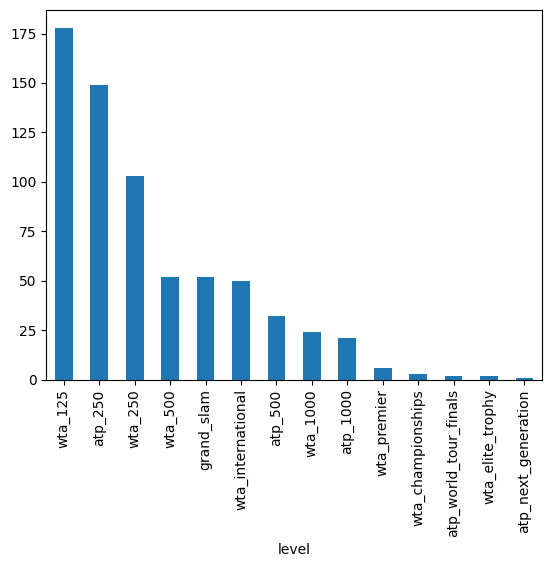

In [ ]:
# crete bar chart count level
df_competitions['level'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df_competitions['id'] = df_competitions['id'].str.split(':').str[2]
print(df_competitions.head())

     id                               name     type gender      category_id  \
0   620                         Hopman Cup    mixed  mixed  sr:category:181   
1   660                     World Team Cup    mixed    men    sr:category:3   
2   990         ATP Challenger Tour Finals  singles    men   sr:category:72   
3  1207  Championship International Series  singles  women    sr:category:6   
4  2100                          Davis Cup    mixed    men   sr:category:76   

               level            parent_id  
0                NaN                  NaN  
1            atp_250                  NaN  
2                NaN  sr:competition:6239  
3  wta_championships                  NaN  
4                NaN                  NaN  


In [ ]:
print(df_competitions['id'].dtype)
print(df_competitions.head())

object
     id                               name     type gender      category_id  \
0   620                         Hopman Cup    mixed  mixed  sr:category:181   
1   660                     World Team Cup    mixed    men    sr:category:3   
2   990         ATP Challenger Tour Finals  singles    men   sr:category:72   
3  1207  Championship International Series  singles  women    sr:category:6   
4  2100                          Davis Cup    mixed    men   sr:category:76   

               level            parent_id  
0                NaN                  NaN  
1            atp_250                  NaN  
2                NaN  sr:competition:6239  
3  wta_championships                  NaN  
4                NaN                  NaN  


In [ ]:
df_competitions['id'].nunique()

6428

In [ ]:
df_competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6428 non-null   int64 
 1   name         6428 non-null   object
 2   type         6428 non-null   object
 3   gender       6422 non-null   object
 4   category_id  6428 non-null   object
 5   level        6428 non-null   object
 6   parent_id    5932 non-null   object
dtypes: int64(1), object(6)
memory usage: 351.7+ KB


In [ ]:
# convert id object toint
df_competitions['id'] = df_competitions['id'].astype(int)

In [ ]:
df_competitions['level'].fillna('Unknown', inplace=True)
print(df_competitions['level'].value_counts())

level
Unknown                  5753
wta_125                   178
atp_250                   149
wta_250                   103
wta_500                    52
grand_slam                 52
wta_international          50
atp_500                    32
wta_1000                   24
atp_1000                   21
wta_premier                 6
wta_championships           3
atp_world_tour_finals       2
wta_elite_trophy            2
atp_next_generation         1
Name: count, dtype: int64


In [ ]:
df_competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6428 non-null   int64 
 1   name         6428 non-null   object
 2   type         6428 non-null   object
 3   gender       6422 non-null   object
 4   category_id  6428 non-null   object
 5   level        6428 non-null   object
 6   parent_id    5932 non-null   object
dtypes: int64(1), object(6)
memory usage: 351.7+ KB


In [ ]:
import sqlite3

# 1. Establish a connection to a SQLite database named 'tennish.db'
conn = sqlite3.connect('tennish.db')
cursor = conn.cursor()

# 2. Create the 'categories' table with 'category_id' as the primary key
cursor.execute('DROP TABLE IF EXISTS categories;') # Drop if exists for idempotency
cursor.execute('''
    CREATE TABLE categories (
        category_id TEXT PRIMARY KEY,
        category_name TEXT
    );
''')

# 3. Insert the data from the df_categories DataFrame into the 'categories' table
df_categories.to_sql('categories', conn, if_exists='append', index=False)

# 4. Create the 'competitions' table with 'id' as primary key and 'category_id' as foreign key
cursor.execute('DROP TABLE IF EXISTS competitions;') # Drop if exists for idempotency
cursor.execute('''
    CREATE TABLE competitions (
        id INTEGER PRIMARY KEY,
        name TEXT,
        type TEXT,
        gender TEXT,
        category_id TEXT,
        level TEXT,
        parent_id TEXT,
        FOREIGN KEY (category_id) REFERENCES categories (category_id)
    );
''')

# 5. Insert the data from the df_competitions DataFrame into the 'competitions' table
df_competitions.to_sql('competitions', conn, if_exists='append', index=False)

# 6. Commit the changes to the database
conn.commit()

# 7. Close the database connection
conn.close()

print("Database 'tennish.db' created successfully with 'categories' and 'competitions' tables.")

Database 'tennish.db' created successfully with 'categories' and 'competitions' tables.


In [ ]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/complexes.json"

headers = {
    "accept": "application/json",
    "x-api-key": "hprz392zoGmHsqKvAt4fSyqurnNpcoVQWTYjEPN5"
}

response = requests.get(url, headers=headers)

print(response.text)
data = json.loads(response.text)
df = pd.DataFrame(data['complexes'])
print(df.head())

{"generated_at":"2025-12-23T10:33:20+00:00","complexes":[{"id":"sr:complex:705","name":"Nacional","venues":[{"id":"sr:venue:70045","name":"Cancha Central","city_name":"Santiago","country_name":"CHILE","country_code":"CHL","timezone":"America\/Santiago"}]},{"id":"sr:complex:1078","name":"Estadio la Cartuja","venues":[{"id":"sr:venue:74858","name":"Court One","city_name":"Seville","country_name":"SPAIN","country_code":"ESP","timezone":"Europe\/Madrid"},{"id":"sr:venue:74856","name":"Centre Court","city_name":"Seville","country_name":"SPAIN","country_code":"ESP","timezone":"Europe\/Madrid"}]},{"id":"sr:complex:1495","name":"Sibur Arena","venues":[{"id":"sr:venue:62153","name":"TC Dynamo","city_name":"Saint Petersburg","country_name":"RUSSIAN FEDERATION","country_code":"RUS","timezone":"Europe\/Moscow"},{"id":"sr:venue:1500","name":"CENTER COURT","city_name":"Saint Petersburg","country_name":"RUSSIAN FEDERATION","country_code":"RUS","timezone":"Europe\/Moscow"},{"id":"sr:venue:1496","name"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      725 non-null    object
 1   name    725 non-null    object
 2   venues  582 non-null    object
dtypes: object(3)
memory usage: 17.1+ KB


In [ ]:
df

,id,name,venues
0,sr:complex:705,Nacional,"[{'id': 'sr:venue:70045', 'name': 'Cancha Cent..."
1,sr:complex:1078,Estadio la Cartuja,"[{'id': 'sr:venue:74858', 'name': 'Court One',..."
2,sr:complex:1495,Sibur Arena,"[{'id': 'sr:venue:62153', 'name': 'TC Dynamo',..."
3,sr:complex:2375,Complexo de Tenis do Jamor,"[{'id': 'sr:venue:70805', 'name': 'Campo 3', '..."
4,sr:complex:4032,Shree Shiv Chhatrapati Sports Complex,NaN
...,...,...,...
720,sr:complex:85476,Rohan Bopanna Tennis Academy,"[{'id': 'sr:venue:85474', 'name': 'Rohan Bopan..."
721,sr:complex:85822,French Touch Academy,"[{'id': 'sr:venue:85830', 'name': 'French Touc..."
722,sr:complex:85944,Pakistan Tennis Federation,"[{'id': 'sr:venue:86004', 'name': 'Court 2', '..."
723,sr:complex:86098,Quito Tenis & Golf Club,"[{'id': 'sr:venue:86168', 'name': 'Cancha 2', ..."


In [ ]:

# --- CLEANING LOGIC ---

# 1. 'Explode' the venues column.
# This turns one row with 3 venues into 3 separate rows (repeating the complex info)
df_exploded = df.explode('venues')

# 2. Extract venue details from the dictionary
# We use apply(pd.Series) again, but we must handle NaNs (like Row 4 in your data)
venue_details = df_exploded['venues'].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series())

# Rename venue columns to avoid collision with complex names
venue_details = venue_details.rename(columns={
    'id': 'venue_id',
    'name': 'venue_name',
    'city_name': 'city',
    'country_name': 'country',
    'country_code': 'country_code',
    'timezone': 'timezone'
})

# 3. Concatenate back with the main dataframe
df_final = pd.concat([df_exploded[['id', 'name']], venue_details], axis=1)

# Rename complex columns for clarity
df_final = df_final.rename(columns={'id': 'complex_id', 'name': 'complex_name'})

# --- RESULT ---
print(df_final.head())

        complex_id        complex_name        venue_id      venue_name  \
0   sr:complex:705            Nacional  sr:venue:70045  Cancha Central   
1  sr:complex:1078  Estadio la Cartuja  sr:venue:74858       Court One   
1  sr:complex:1078  Estadio la Cartuja  sr:venue:74856    Centre Court   
2  sr:complex:1495         Sibur Arena  sr:venue:62153       TC Dynamo   
2  sr:complex:1495         Sibur Arena   sr:venue:1500    CENTER COURT   

               city             country country_code          timezone  
0          Santiago               CHILE          CHL  America/Santiago  
1           Seville               SPAIN          ESP     Europe/Madrid  
1           Seville               SPAIN          ESP     Europe/Madrid  
2  Saint Petersburg  RUSSIAN FEDERATION          RUS     Europe/Moscow  
2  Saint Petersburg  RUSSIAN FEDERATION          RUS     Europe/Moscow  


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3945 entries, 0 to 724
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex_id    3945 non-null   object
 1   complex_name  3945 non-null   object
 2   venue_id      3945 non-null   object
 3   venue_name    3945 non-null   object
 4   city          3945 non-null   object
 5   country       3945 non-null   object
 6   country_code  3945 non-null   object
 7   timezone      3945 non-null   object
dtypes: object(8)
memory usage: 277.4+ KB


In [ ]:
df_final.fillna('Unknown', inplace=True)
print(df_final.isnull().sum())
print(df_final.head())

complex_id      0
complex_name    0
venue_id        0
venue_name      0
city            0
country         0
country_code    0
timezone        0
dtype: int64
        complex_id        complex_name        venue_id      venue_name  \
0   sr:complex:705            Nacional  sr:venue:70045  Cancha Central   
1  sr:complex:1078  Estadio la Cartuja  sr:venue:74858       Court One   
1  sr:complex:1078  Estadio la Cartuja  sr:venue:74856    Centre Court   
2  sr:complex:1495         Sibur Arena  sr:venue:62153       TC Dynamo   
2  sr:complex:1495         Sibur Arena   sr:venue:1500    CENTER COURT   

               city             country country_code          timezone  
0          Santiago               CHILE          CHL  America/Santiago  
1           Seville               SPAIN          ESP     Europe/Madrid  
1           Seville               SPAIN          ESP     Europe/Madrid  
2  Saint Petersburg  RUSSIAN FEDERATION          RUS     Europe/Moscow  
2  Saint Petersburg  RUSSIAN FEDE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   complex_id  725 non-null    object
 1   name        725 non-null    object
 2   venues      582 non-null    object
dtypes: object(3)
memory usage: 17.1+ KB


In [ ]:
# complex id uniqe count
df_final['complex_id'].nunique()

725

In [ ]:
# in df change id name to complex_id
df = df.rename(columns={'id': 'complex_id'})

In [ ]:
# name into complex_name
df = df.rename(columns={'name': 'complex_name'})

In [ ]:
# crete new df dataframe thats contain only complex_id and complex_name
df_complex = df[['complex_id', 'complex_name']]

In [ ]:
df_complex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex_id    725 non-null    object
 1   complex_name  725 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB


In [ ]:
# save this df_complex and df_final into new difffernt table  1. Complexes Table and 2. Venues Table

In [ ]:
import sqlite3

# Establish a connection to a SQLite database named 'tennish.db'
conn = sqlite3.connect('tennish.db')
cursor = conn.cursor()

# Create the 'complexes' table with 'complex_id' as the primary key
cursor.execute('DROP TABLE IF EXISTS complexes;') # Drop if exists for idempotency
cursor.execute('''
    CREATE TABLE complexes (
        complex_id TEXT PRIMARY KEY,
        complex_name TEXT
    );
''')

# Insert the data from the df_complex DataFrame into the 'complexes' table
df_complex.to_sql('complexes', conn, if_exists='append', index=False)

# Create the 'venues' table with 'venue_id' as primary key and 'complex_id' as foreign key
cursor.execute('DROP TABLE IF EXISTS venues;') # Drop if exists for idempotency
cursor.execute('''
    CREATE TABLE venues (
        complex_id TEXT,
        complex_name TEXT,
        venue_id TEXT PRIMARY KEY,
        venue_name TEXT,
        city TEXT,
        country TEXT,
        country_code TEXT,
        timezone TEXT,
        FOREIGN KEY (complex_id) REFERENCES complexes (complex_id)
    );
''')

# Remove duplicates from df_final based on 'venue_id' before inserting
df_final_unique_venues = df_final.drop_duplicates(subset=['venue_id'])

# Insert the data from the df_final_unique_venues DataFrame into the 'venues' table
df_final_unique_venues.to_sql('venues', conn, if_exists='append', index=False)

# Commit the changes to the database
conn.commit()

# Close the database connection
conn.close()

print("Tables 'complexes' and 'venues' created and populated successfully in 'tennish.db'.")

Tables 'complexes' and 'venues' created and populated successfully in 'tennish.db'.


In [ ]:
df_final_unique_venues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 0 to 724
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex_id    3803 non-null   object
 1   complex_name  3803 non-null   object
 2   venue_id      3803 non-null   object
 3   venue_name    3803 non-null   object
 4   city          3803 non-null   object
 5   country       3803 non-null   object
 6   country_code  3803 non-null   object
 7   timezone      3803 non-null   object
dtypes: object(8)
memory usage: 267.4+ KB


In [ ]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/double_competitors_rankings.json"

headers = {
    "accept": "application/json",
    "x-api-key": "hprz392zoGmHsqKvAt4fSyqurnNpcoVQWTYjEPN5"
}

response = requests.get(url, headers=headers)

print(response.text)
data = json.loads(response.text)
df = pd.DataFrame(data['rankings'])
print(df.head())

{"generated_at":"2025-12-23T12:19:36+00:00","rankings":[{"type_id":2,"name":"ATP","year":2025,"week":52,"gender":"men","competitor_rankings":[{"rank":1,"movement":0,"points":8610,"competitions_played":23,"competitor":{"id":"sr:competitor:59131","name":"Glasspool, Lloyd","country":"Great Britain","country_code":"GBR","abbreviation":"GLA"}},{"rank":2,"movement":0,"points":8520,"competitions_played":24,"competitor":{"id":"sr:competitor:108099","name":"Cash, Julian","country":"Great Britain","country_code":"GBR","abbreviation":"CAS"}},{"rank":3,"movement":0,"points":7980,"competitions_played":23,"competitor":{"id":"sr:competitor:14898","name":"Heliovaara, Harri","country":"Finland","country_code":"FIN","abbreviation":"HEL"}},{"rank":3,"movement":0,"points":7980,"competitions_played":23,"competitor":{"id":"sr:competitor:637970","name":"Patten, Henry","country":"Great Britain","country_code":"GBR","abbreviation":"PAT"}},{"rank":5,"movement":0,"points":7115,"competitions_played":18,"competito

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type_id              2 non-null      int64 
 1   name                 2 non-null      object
 2   year                 2 non-null      int64 
 3   week                 2 non-null      int64 
 4   gender               2 non-null      object
 5   competitor_rankings  2 non-null      object
dtypes: int64(3), object(3)
memory usage: 228.0+ bytes


In [ ]:
df

,type_id,name,year,week,gender,competitor_rankings
0,2,ATP,2025,52,men,"[{'rank': 1, 'movement': 0, 'points': 8610, 'c..."
1,2,WTA,2025,52,women,"[{'rank': 1, 'movement': 0, 'points': 8780, 'c..."


In [ ]:


# 1. Load data (Assuming you loaded the JSON)
# df = pd.read_json("tennis_data/doubles_rankings.json")

# --- CLEANING LOGIC ---

# 1. 'Explode' the competitor_rankings column.
# This creates a separate row for every single player ranking
df_exploded = df.explode('competitor_rankings')

# 2. Reset index to keep things clean
df_exploded = df_exploded.reset_index(drop=True)

# 3. Extract ranking details (points, rank, movement)
# We take the dictionary from 'competitor_rankings' and turn it into columns
ranking_details = df_exploded['competitor_rankings'].apply(pd.Series)

# 4. Extract competitor profile details
# Inside ranking_details, there is ANOTHER dictionary called 'competitor'. We need that too.
competitor_profile = ranking_details['competitor'].apply(pd.Series)

# Rename columns to avoid confusion
competitor_profile = competitor_profile.rename(columns={
    'id': 'competitor_id',
    'name': 'competitor_name',
    'country': 'country',
    'country_code': 'country_code',
    'abbreviation': 'abbreviation'
})

# 5. Combine everything into one giant table
df_final = pd.concat([
    df_exploded[['name', 'year', 'week', 'gender']], # Context (ATP/WTA, Year)
    ranking_details[['rank', 'movement', 'points', 'competitions_played']], # Stats
    competitor_profile # Player Info
], axis=1)

# --- RESULT ---
print(df_final.head())
# You will see columns like: name (ATP), rank (1), competitor_name (Glasspool, Lloyd), points (8610)

  name  year  week gender  rank  movement  points  competitions_played  \
0  ATP  2025    52    men     1         0    8610                   23   
1  ATP  2025    52    men     2         0    8520                   24   
2  ATP  2025    52    men     3         0    7980                   23   
3  ATP  2025    52    men     3         0    7980                   23   
4  ATP  2025    52    men     5         0    7115                   18   

          competitor_id    competitor_name        country country_code  \
0   sr:competitor:59131   Glasspool, Lloyd  Great Britain          GBR   
1  sr:competitor:108099       Cash, Julian  Great Britain          GBR   
2   sr:competitor:14898  Heliovaara, Harri        Finland          FIN   
3  sr:competitor:637970      Patten, Henry  Great Britain          GBR   
4   sr:competitor:16160  Zeballos, Horacio      Argentina          ARG   

  abbreviation  
0          GLA  
1          CAS  
2          HEL  
3          PAT  
4          ZEB  


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1000 non-null   object
 1   year                 1000 non-null   int64 
 2   week                 1000 non-null   int64 
 3   gender               1000 non-null   object
 4   rank                 1000 non-null   int64 
 5   movement             1000 non-null   int64 
 6   points               1000 non-null   int64 
 7   competitions_played  1000 non-null   int64 
 8   competitor_id        1000 non-null   object
 9   competitor_name      1000 non-null   object
 10  country              1000 non-null   object
 11  country_code         947 non-null    object
 12  abbreviation         1000 non-null   object
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


In [ ]:
df_final.fillna('Unknown', inplace=True)
print(df_final.isnull().sum())

name                   0
year                   0
week                   0
gender                 0
rank                   0
movement               0
points                 0
competitions_played    0
competitor_id          0
competitor_name        0
country                0
country_code           0
abbreviation           0
dtype: int64


In [ ]:
df_final.head()

,name,year,week,gender,rank,movement,points,competitions_played,competitor_id,competitor_name,country,country_code,abbreviation
0,ATP,2025,52,men,1,0,8610,23,sr:competitor:59131,"Glasspool, Lloyd",Great Britain,GBR,GLA
1,ATP,2025,52,men,2,0,8520,24,sr:competitor:108099,"Cash, Julian",Great Britain,GBR,CAS
2,ATP,2025,52,men,3,0,7980,23,sr:competitor:14898,"Heliovaara, Harri",Finland,FIN,HEL
3,ATP,2025,52,men,3,0,7980,23,sr:competitor:637970,"Patten, Henry",Great Britain,GBR,PAT
4,ATP,2025,52,men,5,0,7115,18,sr:competitor:16160,"Zeballos, Horacio",Argentina,ARG,ZEB


In [ ]:
# df_final gender nunique
df_final['rank'].nunique()

499

In [ ]:
df_final['rank_id'].nunique()

1000

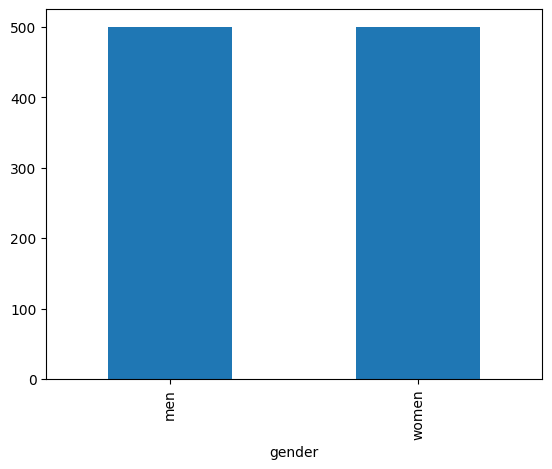

In [ ]:
#df final gender distribution count bar plot
df_final['gender'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df_final['rank_id'] = np.arange(len(df_final)) + 1
print(df_final.head())

  name  year  week gender  rank  movement  points  competitions_played  \
0  ATP  2025    52    men     1         0    8610                   23   
1  ATP  2025    52    men     2         0    8520                   24   
2  ATP  2025    52    men     3         0    7980                   23   
3  ATP  2025    52    men     3         0    7980                   23   
4  ATP  2025    52    men     5         0    7115                   18   

          competitor_id    competitor_name        country country_code  \
0   sr:competitor:59131   Glasspool, Lloyd  Great Britain          GBR   
1  sr:competitor:108099       Cash, Julian  Great Britain          GBR   
2   sr:competitor:14898  Heliovaara, Harri        Finland          FIN   
3  sr:competitor:637970      Patten, Henry  Great Britain          GBR   
4   sr:competitor:16160  Zeballos, Horacio      Argentina          ARG   

  abbreviation  rank_id  
0          GLA        1  
1          CAS        2  
2          HEL        3  
3     

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1000 non-null   object
 1   year                 1000 non-null   int64 
 2   week                 1000 non-null   int64 
 3   gender               1000 non-null   object
 4   rank                 1000 non-null   int64 
 5   movement             1000 non-null   int64 
 6   points               1000 non-null   int64 
 7   competitions_played  1000 non-null   int64 
 8   competitor_id        1000 non-null   object
 9   competitor_name      1000 non-null   object
 10  country              1000 non-null   object
 11  country_code         1000 non-null   object
 12  abbreviation         1000 non-null   object
 13  rank_id              1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [ ]:
df_competitors_table = df_final[['competitor_id', 'competitor_name', 'country', 'country_code', 'abbreviation']].drop_duplicates()

In [ ]:
df_competitors_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   competitor_id    1000 non-null   object
 1   competitor_name  1000 non-null   object
 2   country          1000 non-null   object
 3   country_code     1000 non-null   object
 4   abbreviation     1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [ ]:
df_rankings_table = df_final[['rank_id','competitor_id','year', 'week', 'rank', 'points', 'movement', 'competitions_played']]

In [ ]:
df_rankings_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank_id              1000 non-null   int64 
 1   competitor_id        1000 non-null   object
 2   year                 1000 non-null   int64 
 3   week                 1000 non-null   int64 
 4   rank                 1000 non-null   int64 
 5   points               1000 non-null   int64 
 6   movement             1000 non-null   int64 
 7   competitions_played  1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [ ]:
# Competitor_Rankings Table, 2. Competitors Table crete new table put in tennies db

In [ ]:
import sqlite3

# Establish a connection to a SQLite database named 'tennish.db'
conn = sqlite3.connect('tennish.db')
cursor = conn.cursor()

# Create the 'competitors' table with 'competitor_id' as the primary key
cursor.execute('DROP TABLE IF EXISTS competitors;') # Drop if exists for idempotency
cursor.execute('''
    CREATE TABLE competitors (
        competitor_id TEXT PRIMARY KEY,
        competitor_name TEXT,
        country TEXT,
        country_code TEXT,
        abbreviation TEXT
    );
''')

# Insert the data from the df_competitors_table DataFrame into the 'competitors' table
df_competitors_table.to_sql('competitors', conn, if_exists='append', index=False)

# Commit the changes to the database
conn.commit()

# Close the database connection
conn.close()

print("Table 'competitors' created and populated successfully in 'tennish.db'.")

Table 'competitors' created and populated successfully in 'tennish.db'.


In [ ]:
import sqlite3

# Establish a connection to a SQLite database named 'tennish.db'
conn = sqlite3.connect('tennish.db')
cursor = conn.cursor()

# Create the 'competitor_rankings' table with 'rank_id' as primary key and 'competitor_id' as foreign key
cursor.execute('DROP TABLE IF EXISTS competitor_rankings;') # Drop if exists for idempotency
cursor.execute('''
    CREATE TABLE competitor_rankings (
        rank_id INTEGER PRIMARY KEY,
        competitor_id TEXT,
        year INTEGER,
        week INTEGER,
        rank INTEGER,
        points INTEGER,
        movement INTEGER,
        competitions_played INTEGER,
        FOREIGN KEY (competitor_id) REFERENCES competitors (competitor_id)
    );
''')

# Insert the data from the df_rankings_table DataFrame into the 'competitor_rankings' table
df_rankings_table.to_sql('competitor_rankings', conn, if_exists='append', index=False)

# Commit the changes to the database
conn.commit()

# Close the database connection
conn.close()

print("Table 'competitor_rankings' created and populated successfully in 'tennish.db'.")

Table 'competitor_rankings' created and populated successfully in 'tennish.db'.


In [ ]:
import sqlite3
import pandas as pd

# 1. Establish a connection to the SQLite database named 'tennish.db'
conn = sqlite3.connect('tennish.db')

print("Verifying 'categories' table:")
categories_head = pd.read_sql_query("SELECT * FROM categories LIMIT 5;", conn)
print("First 5 rows of 'categories' table:")
print(categories_head)
categories_count = pd.read_sql_query("SELECT COUNT(*) FROM categories;", conn)
print("\nTotal rows in 'categories' table:")
print(categories_count)

print("\nVerifying 'competitions' table:")
competitions_head_db = pd.read_sql_query("SELECT * FROM competitions LIMIT 5;", conn)
print("First 5 rows of 'competitions' table:")
print(competitions_head_db)
competitions_count = pd.read_sql_query("SELECT COUNT(*) FROM competitions;", conn)
print("\nTotal rows in 'competitions' table:")
print(competitions_count)

print("\nVerifying 'complexes' table:")
complexes_head_db = pd.read_sql_query("SELECT * FROM complexes LIMIT 5;", conn)
print("First 5 rows of 'complexes' table:")
print(complexes_head_db)
complexes_count = pd.read_sql_query("SELECT COUNT(*) FROM complexes;", conn)
print("\nTotal rows in 'complexes' table:")
print(complexes_count)

print("\nVerifying 'venues' table:")
venues_head_db = pd.read_sql_query("SELECT * FROM venues LIMIT 5;", conn)
print("First 5 rows of 'venues' table:")
print(venues_head_db)
venues_count = pd.read_sql_query("SELECT COUNT(*) FROM venues;", conn)
print("\nTotal rows in 'venues' table:")
print(venues_count)

print("\nVerifying 'competitors' table:")
competitors_head = pd.read_sql_query("SELECT * FROM competitors LIMIT 5;", conn)
print("First 5 rows of 'competitors' table:")
print(competitors_head)
competitors_count = pd.read_sql_query("SELECT COUNT(*) FROM competitors;", conn)
print("\nTotal rows in 'competitors' table:")
print(competitors_count)

print("\nVerifying 'competitor_rankings' table:")
competitor_rankings_head = pd.read_sql_query("SELECT * FROM competitor_rankings LIMIT 5;", conn)
print("First 5 rows of 'competitor_rankings' table:")
print(competitor_rankings_head)
competitor_rankings_count = pd.read_sql_query("SELECT COUNT(*) FROM competitor_rankings;", conn)
print("\nTotal rows in 'competitor_rankings' table:")
print(competitor_rankings_count)

# 6. Close the database connection
conn.close()

print("\nDatabase connection closed.")

Verifying 'categories' table:
First 5 rows of 'categories' table:
       category_id category_name
0  sr:category:181    Hopman Cup
1    sr:category:3           ATP
2   sr:category:72    Challenger
3    sr:category:6           WTA
4   sr:category:76     Davis Cup

Total rows in 'categories' table:
   COUNT(*)
0        18

Verifying 'competitions' table:
First 5 rows of 'competitions' table:
     id                               name     type gender      category_id  \
0   620                         Hopman Cup    mixed  mixed  sr:category:181   
1   660                     World Team Cup    mixed    men    sr:category:3   
2   990         ATP Challenger Tour Finals  singles    men   sr:category:72   
3  1207  Championship International Series  singles  women    sr:category:6   
4  2100                          Davis Cup    mixed    men   sr:category:76   

               level            parent_id  
0            Unknown                 None  
1            atp_250                 None  